In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/no/14 no.jpg
/kaggle/input/no/26 no.jpg
/kaggle/input/no/N15.jpg
/kaggle/input/no/8 no.jpg
/kaggle/input/no/N22.JPG
/kaggle/input/no/38 no.jpg
/kaggle/input/no/No22.jpg
/kaggle/input/no/31 no.jpg
/kaggle/input/no/No15.jpg
/kaggle/input/no/22 no.jpg
/kaggle/input/no/no 7.jpeg
/kaggle/input/no/44no.jpg
/kaggle/input/no/no 94.jpg
/kaggle/input/no/no 6.jpg
/kaggle/input/no/no 1.jpg
/kaggle/input/no/17 no.jpg
/kaggle/input/no/no 99.jpg
/kaggle/input/no/3 no.jpg
/kaggle/input/no/N16.jpg
/kaggle/input/no/no 92.jpg
/kaggle/input/no/19 no.jpg
/kaggle/input/no/No17.jpg
/kaggle/input/no/no 95.jpg
/kaggle/input/no/33 no.jpg
/kaggle/input/no/N3.jpg
/kaggle/input/no/21 no.jpg
/kaggle/input/no/25 no.jpg
/kaggle/input/no/No18.jpg
/kaggle/input/no/No16.jpg
/kaggle/input/no/39 no.jpg
/kaggle/input/no/47 no.jpg
/kaggle/input/no/36 no.jpg
/kaggle/input/no/48 no.jpeg
/kaggle/input/no/no 89.jpg
/kaggle/input/no/N20.JPG
/kaggle/input/no/40 no.jpg
/kaggle/input/no/No20.jpg
/kaggle/input/no/no 97

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


Using TensorFlow backend.


In [3]:
os.listdir('../input/Brain tumor detection/brain_tumor_dataset.zip')

FileNotFoundError: [Errno 2] No such file or directory: '../input/Brain tumor detection/brain_tumor_dataset.zip'

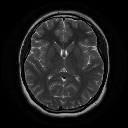

In [4]:
im =Image.open('../input/brain_tumor_dataset/no/1 no.jpeg').resize((128,128))
im

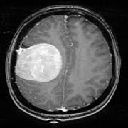

In [5]:
im =Image.open('../input/brain_tumor_dataset/yes/Y1.jpg').resize((128,128))
im

In [6]:
yes=os.listdir('../input/brain_tumor_dataset/yes')
no=os.listdir('../input/brain_tumor_dataset/no')

In [7]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [8]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [9]:
len(data_target)==len(data)

True

In [10]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
data

array(['Y12.jpg', 'Y81.jpg', 'Y166.JPG', 'Y27.jpg', 'Y42.jpg', 'Y109.JPG',
       'Y96.jpg', 'Y23.JPG', 'Y35.jpg', 'Y91.jpg', 'Y180.jpg', 'Y164.JPG',
       'Y44.JPG', 'Y61.jpg', 'Y65.JPG', 'Y67.JPG', 'Y112.JPG', 'Y100.JPG',
       'Y95.jpg', 'Y105.jpg', 'Y245.jpg', 'Y9.jpg', 'Y86.JPG', 'Y183.jpg',
       'Y62.jpg', 'Y78.jpg', 'Y115.JPG', 'Y258.JPG', 'Y117.JPG',
       'Y85.JPG', 'Y169.jpg', 'Y254.jpg', 'Y75.JPG', 'Y71.JPG', 'Y40.JPG',
       'Y246.JPG', 'Y82.jpg', 'Y33.jpg', 'Y24.jpg', 'Y45.JPG', 'Y28.jpg',
       'Y107.jpg', 'Y39.jpg', 'Y255.JPG', 'Y253.JPG', 'Y154.jpg',
       'Y22.jpg', 'Y153.jpg', 'Y155.JPG', 'Y160.JPG', 'Y158.JPG',
       'Y104.jpg', 'Y47.JPG', 'Y108.jpg', 'Y148.JPG', 'Y90.jpg',
       'Y89.JPG', 'Y259.JPG', 'Y11.jpg', 'Y188.jpg', 'Y157.JPG',
       'Y192.JPG', 'Y56.jpg', 'Y244.JPG', 'Y248.JPG', 'Y52.jpg',
       'Y92.png', 'Y106.jpg', 'Y250.jpg', 'Y162.jpg', 'Y55.jpg',
       'Y98.JPG', 'Y20.jpg', 'Y193.JPG', 'Y170.JPG', 'Y41.jpg', 'Y99.JPG',
       'Y30.jpg', '

In [12]:
yes_values=os.listdir('../input/brain_tumor_dataset/yes')
no_values=os.listdir('../input/brain_tumor_dataset/no')

In [13]:
X_data =[]
for file in yes_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('../input/brain_tumor_dataset/yes/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [14]:
#X_data =[]
for file in no_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('../input/brain_tumor_dataset/no/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [15]:
len(X_data)==len(data)==len(data_target)

True

In [16]:
X = np.squeeze(X_data)

In [17]:
X.shape

(253, 32, 32, 3)

In [18]:
# normalize data
X = X.astype('float32')
X /= 255

In [19]:
#categorical_labels = to_categorical(data_target, num_classes=2)

In [20]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])
#(x_test, y_test) = (x_test[63:], y_test[63:])

In [22]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        3904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        20752     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 36)          4

In [23]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [24]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

Train on 190 samples, validate on 63 samples
Epoch 1/150
190/190 [==============================] - 2s 9ms/sample - loss: 0.6177 - acc: 0.5947 - val_loss: 1.7964 - val_acc: 0.0000e+00
Epoch 2/150
190/190 [==============================] - 1s 3ms/sample - loss: 0.5601 - acc: 0.8158 - val_loss: 0.9563 - val_acc: 0.0000e+00
Epoch 3/150
190/190 [==============================] - 1s 3ms/sample - loss: 0.4845 - acc: 0.8158 - val_loss: 0.8343 - val_acc: 0.0000e+00
Epoch 4/150
190/190 [==============================] - 1s 3ms/sample - loss: 0.5110 - acc: 0.8158 - val_loss: 0.9086 - val_acc: 0.0000e+00
Epoch 5/150
190/190 [==============================] - 1s 3ms/sample - loss: 0.4702 - acc: 0.8158 - val_loss: 1.1639 - val_acc: 0.0000e+00
Epoch 6/150
190/190 [==============================] - 1s 3ms/sample - loss: 0.4599 - acc: 0.8158 - val_loss: 1.2924 - val_acc: 0.0000e+00
Epoch 7/150
190/190 [==============================] - 1s 3ms/sample - loss: 0.4752 - acc: 0.8158 - val_loss: 1.1045 - va

In [25]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

TypeError: 'InputLayer' object is not iterable

In [26]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

TypeError: 'InputLayer' object is not iterable

In [27]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.63492066


In [28]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

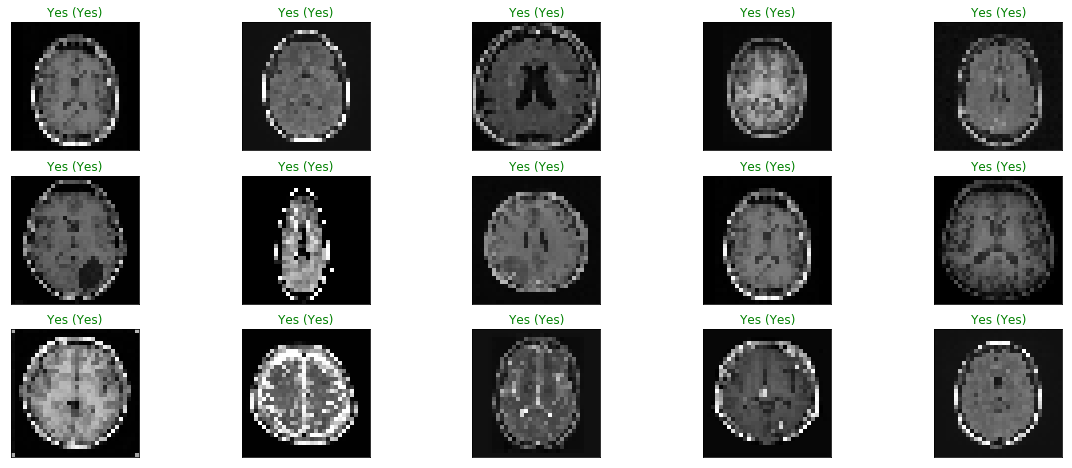

In [29]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()